In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f1 = pd.read_csv(r"C:\Users\anurag\Desktop\DATA SCIENCE\Loan Prediction\test_data.csv")
f2 = pd.read_csv(r"C:\Users\anurag\Desktop\DATA SCIENCE\Loan Prediction\train_data.csv")

In [3]:
ldata=f1.append(f2)

In [4]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [5]:
ldata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
ldata.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

# Gender

In [7]:
pd.crosstab(ldata['Gender'].fillna('missing'),ldata['Married'])

Married,No,Yes
Gender,,
Female,124,57
Male,212,561
missing,11,13


In [8]:
ldata.loc[(ldata['Married']=="No").fillna('missing'),'Gender']="Male"
ldata.loc[(ldata['Married']=="Yes").fillna('missing'),'Gender']="Female"

In [9]:
print(ldata.Gender.isna().sum())
print(ldata.Gender.value_counts())

0
Female    632
Male      349
Name: Gender, dtype: int64


# Married

In [10]:
ldata.Married.fillna(ldata.Married.mode()[0],inplace=True)

In [11]:
ldata.Married.isna().sum()

0

# Dependents

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

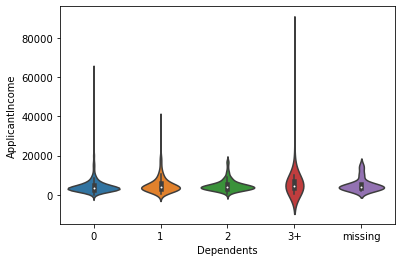

In [12]:
sns.violinplot(ldata.Dependents.fillna("missing"),ldata.ApplicantIncome)

In [13]:
ldata.Dependents.fillna(0,inplace=True)

In [14]:
print(ldata.Dependents.value_counts())
print(ldata.Dependents.isna().sum())

0     545
1     160
2     160
3+     91
0      25
Name: Dependents, dtype: int64
0


# Self_Employed

In [15]:
pd.crosstab(ldata.Self_Employed.fillna('missing'),ldata.Education)

Education,Graduate,Not Graduate
Self_Employed,,
No,626,181
Yes,94,25
missing,43,12


In [16]:
ldata.loc[(ldata.Education=='Graduate').fillna('missing'),'Self_Employed']='No'
ldata.loc[(ldata.Education=='Not Graduate').fillna('missing'),'Self_Employed']='Yes'

In [17]:
print(ldata.Self_Employed.value_counts())
print(ldata.Self_Employed.isna().sum())

No     763
Yes    218
Name: Self_Employed, dtype: int64
0


# LoanAmount

In [18]:
median=ldata.LoanAmount.median()
print("median -",median)
print("-----------------")
print("isna value -",ldata.LoanAmount.isna().sum())

median - 126.0
-----------------
isna value - 27


In [19]:
ldata.LoanAmount.fillna(126.0,inplace=True)

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

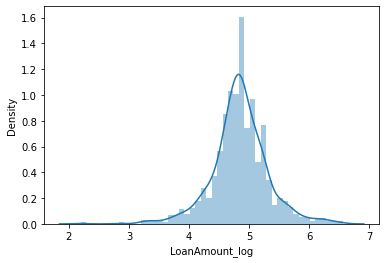

In [20]:
ldata['LoanAmount_log'] = np.log(ldata.LoanAmount)
sns.distplot(ldata.LoanAmount_log)

# Loan_Amount_Term

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

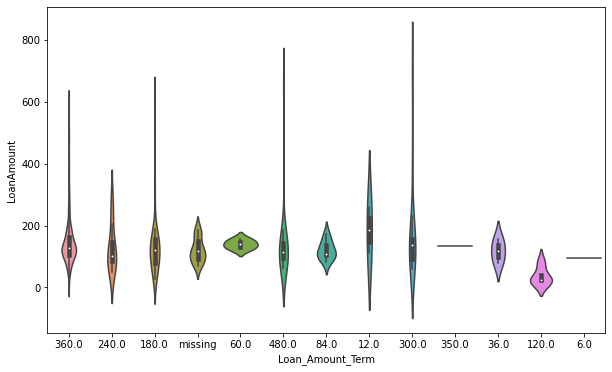

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(ldata.Loan_Amount_Term.fillna("missing"),ldata.LoanAmount)

In [22]:
ldata.Loan_Amount_Term.fillna(84.0,inplace=True)

In [23]:
ldata.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
84.0      27
480.0     23
300.0     20
240.0      8
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

# Credit_History

In [24]:
ldata.Credit_History.fillna(0,inplace=True)

In [25]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     981 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 147.2+ KB


# distplot(ApplicantIncome)

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

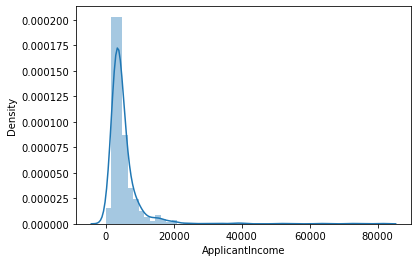

In [26]:
sns.distplot(ldata.ApplicantIncome)

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

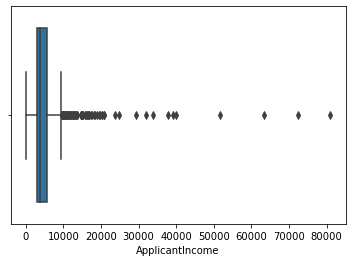

In [27]:
sns.boxplot(ldata.ApplicantIncome)

In [28]:
per99=np.percentile(ldata.ApplicantIncome,99)
m3s=np.mean(ldata.ApplicantIncome)+3*np.std(ldata.ApplicantIncome)
iqr=(np.percentile(ldata.ApplicantIncome,75)-np.percentile(ldata.ApplicantIncome,25))*3+np.percentile(ldata.ApplicantIncome,75)
print("per99 -",per99)
print("m3s -",m3s)
print("iqr -",iqr)

per99 - 25671.0000000002
m3s - 22256.398373420736
iqr - 13439.0


In [29]:
print('per99 -',ldata.loc[ldata.ApplicantIncome>per99,"ApplicantIncome"].count())
print('m3s -',ldata.loc[ldata.ApplicantIncome>m3s,"ApplicantIncome"].count())
print('iqr -',ldata.loc[ldata.ApplicantIncome>iqr,"ApplicantIncome"].count())

per99 - 10
m3s - 12
iqr - 44


In [30]:
ldata.ApplicantIncome = np.where(ldata.ApplicantIncome>per99,per99,ldata.ApplicantIncome)

# CoapplicantIncome

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

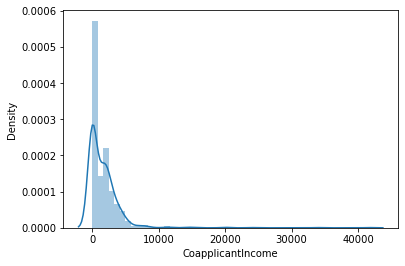

In [31]:
sns.distplot(ldata.CoapplicantIncome)

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

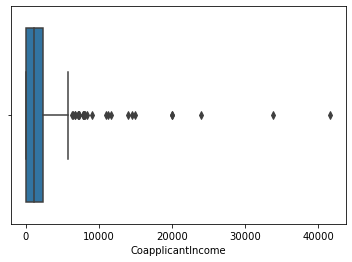

In [32]:
sns.boxplot(ldata.CoapplicantIncome)

In [33]:
m3s=per99=np.percentile(ldata.CoapplicantIncome,99)
m3s=np.mean(ldata.CoapplicantIncome)+3*np.std(ldata.CoapplicantIncome)
iqr=(np.percentile(ldata.CoapplicantIncome,75)-np.percentile(ldata.CoapplicantIncome,25))*3+np.percentile(ldata.CoapplicantIncome,75)
print("per99 -",per99)
print("m3s -",m3s)
print("iqr -",iqr)
print("------------------------------")
print('per99 -',ldata.loc[ldata.CoapplicantIncome>per99,"CoapplicantIncome"].count())
print('m3s -',ldata.loc[ldata.CoapplicantIncome>m3s,"CoapplicantIncome"].count())
print('iqr -',ldata.loc[ldata.CoapplicantIncome>iqr,"CoapplicantIncome"].count())
print("------------------------------")
ldata.CoapplicantIncome = np.where(ldata.CoapplicantIncome>m3s,m3s,ldata.CoapplicantIncome)

per99 - 11034.400000000016
m3s - 9754.076544316635
iqr - 9460.0
------------------------------
per99 - 10
m3s - 11
iqr - 11
------------------------------


C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

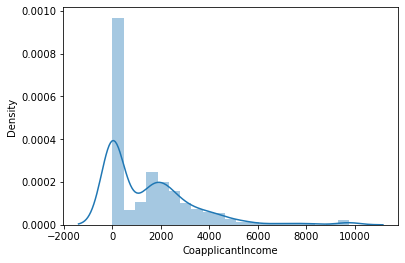

In [34]:
#plt.figure(figsize=(10,5))
sns.distplot(ldata.CoapplicantIncome)

In [35]:
ldata['total_income'] = ldata.ApplicantIncome + ldata.CoapplicantIncome  
ldata['total_income_log'] = np.log(ldata['total_income'])

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income_log', ylabel='Density'>

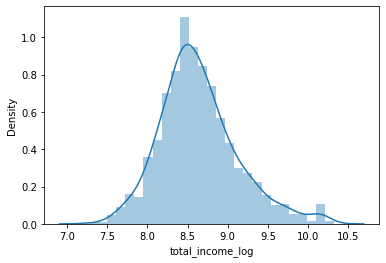

In [36]:
sns.distplot(ldata['total_income_log'])

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_income_log'>

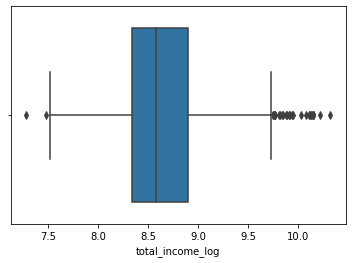

In [37]:
sns.boxplot((ldata['total_income_log']))

# import sklearn_MODEL

In [38]:
loandata = pd.read_csv(r"C:\Users\anurag\Desktop\DATA SCIENCE\Loan Prediction\ldata.csv")

In [39]:
loandata.drop(["Loan_ID","total_income_log","LoanAmount_log","LoanAmount_log"],axis=1,inplace=True)

In [40]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    int64  
 8   Loan_Amount_Term   981 non-null    int64  
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    object 
 11  total_income       981 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 99.8+ KB


In [41]:
train=loandata.loc[loandata.Loan_Status.notnull(),]
test=loandata.loc[loandata.Loan_Status.isnull(),]

In [42]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,Loan_Status
367,Male,No,0,Graduate,No,5849,0.0,126,360,1,Urban,5849.0,Y
368,Female,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,6091.0,N
369,Female,Yes,0,Graduate,No,3000,0.0,66,360,1,Urban,3000.0,Y
370,Female,Yes,0,Not Graduate,Yes,2583,2358.0,120,360,1,Urban,4941.0,Y
371,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,6000.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,No,0,Graduate,No,2900,0.0,71,360,1,Rural,2900.0,Y
977,Female,Yes,3+,Graduate,No,4106,0.0,40,180,1,Rural,4106.0,Y
978,Female,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,8312.0,Y
979,Female,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,7583.0,Y


In [43]:
train.shape,test.shape

((614, 13), (367, 13))

In [44]:
train_y=train["Loan_Status"]
train_x=train.drop("Loan_Status",axis=1)
test_x=test.drop("Loan_Status",axis=1)

train_y.shape,train_x.shape,test_x.shape

((614,), (614, 12), (367, 12))

In [45]:
train_x=pd.get_dummies(train_x,drop_first=True)
test_x=pd.get_dummies(test_x,drop_first=True)

In [46]:
train_x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
367,5849,0.0,126,360,1,5849.0,1,0,0,0,0,0,0,0,1
368,4583,1508.0,128,360,1,6091.0,0,1,1,0,0,0,0,0,0
369,3000,0.0,66,360,1,3000.0,0,1,0,0,0,0,0,0,1
370,2583,2358.0,120,360,1,4941.0,0,1,0,0,0,1,1,0,1
371,6000,0.0,141,360,1,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2900,0.0,71,360,1,2900.0,1,0,0,0,0,0,0,0,0
977,4106,0.0,40,180,1,4106.0,0,1,0,0,1,0,0,0,0
978,8072,240.0,253,360,1,8312.0,0,1,1,0,0,0,0,0,1
979,7583,0.0,187,360,1,7583.0,0,1,0,1,0,0,0,0,1


In [47]:
train_x.shape,test_x.shape

((614, 15), (367, 15))

# model

In [48]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

In [49]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [51]:
from sklearn import *
pred_y = lr.predict(test_x)
#print(pred_y)

In [52]:
tdata = ldata.loc[ldata.Loan_Status.isnull(),]  
tdata.shape

(367, 16)

In [53]:
pred1=pd.concat([tdata.Loan_ID,pd.DataFrame({"Loan_Status":pred_y})],axis=1)
pred1.shape

(367, 2)

In [54]:
pred1.Loan_Status.value_counts()

Y    297
N     70
Name: Loan_Status, dtype: int64

In [58]:
pred1.to_csv(r"C:/Users/anurag\Desktop\DATA SCIENCE\Loan Prediction\prediction ready files\prediction-1.csv",index=False)

# Data Distribution

In [60]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    int64  
 8   Loan_Amount_Term   981 non-null    int64  
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    object 
 11  total_income       981 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 99.8+ KB


In [62]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(train_x,train_y)

DecisionTreeClassifier()

In [66]:
dtree.predict(test_x)

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [70]:
dtree.score(train_x,train_y)

1.0